# 📦 Optimización de la Gestión de Devoluciones con IA
## 🚀 Implementación de Fast Prompting en la Gestión de Devoluciones

## 📌 Problema y Solución Propuesta (Resumen de la Primera Entrega)

### 📦 Problema: Gestión Ineficiente de Devoluciones en Empresas de Intermediación de Compras Internacionales  

Las empresas que actúan como intermediarias en compras internacionales enfrentan problemas recurrentes en la entrega de productos, generando costos adicionales y frustración en los clientes. Entre los principales inconvenientes se encuentran:  

1. **Errores en la entrega:** Productos incorrectos enviados a los clientes finales.  
2. **Procesos de devolución complejos:** Muchos clientes deben asumir costos de envío para devolver productos erróneos.  
3. **Falta de validación automática de los paquetes antes de su despacho.**  
4. **Mala comunicación entre la empresa intermediaria y la tienda vendedora.**  
5. **Requerimiento de devoluciones presenciales**, lo que no es práctico para clientes que recibieron su pedido puerta a puerta.  

---

### 🚀 Solución Propuesta: Optimización con IA y Fast Prompting  

💡 **Implementación de un sistema basado en IA para optimizar la gestión de devoluciones.**  

### 🔍 Fase 1: Verificación Automática del Pedido con IA  
✅ **Uso de Computer Vision** para analizar imágenes del paquete y compararlas con la orden de compra.  
✅ **Escaneo de códigos de barras y etiquetas RFID** para cotejar con el pedido.  
✅ **Alerta automática si hay discrepancias** antes de despachar al cliente final.  

### 📦 Fase 2: Opciones de Devolución Simplificadas  
✅ **Código QR para devoluciones sin embalaje ni etiqueta impresa.**  
✅ **Puntos de devolución en ubicaciones estratégicas o recogida a domicilio.**  
✅ **Posibilidad de usar transportistas externos con rastreo del paquete.**  

### 📜 Fase 3: Seguimiento y Reembolsos Automatizados  
✅ **Si el cliente ya recibió un reembolso anticipado, se rastrea la devolución.**  
✅ **Si el producto no es devuelto, se aplica un cobro automático.**  
✅ **El reembolso se procesa en un máximo de 3 días hábiles tras la recepción del producto.**  


In [ ]:
# Cargar bibliotecas necesarias
import cv2
import numpy as np
from tensorflow.keras.models import load_model


In [ ]:
#⃣ Fase 1: Verificación del Pedido con IA (Visión por Computadora)
# Cargar modelo de reconocimiento de productos (simulación)
# En un caso real, se entrenaría un modelo para clasificar los productos recibidos
try:
    model = load_model('modelo_reconocimiento_productos.h5')
except:
    print("⚠️ Advertencia: Modelo de reconocimiento no disponible.")

def verificar_producto(imagen):
    """Función para analizar la imagen del producto recibido y compararla con la orden esperada."""
    img = cv2.imread(imagen)
    img = cv2.resize(img, (224, 224))  # Redimensionar para el modelo
    img = np.expand_dims(img, axis=0)  # Agregar batch dimension

    try:
        prediccion = model.predict(img)
        return prediccion  # Simulación de retorno de clase de producto
    except:
        return "⚠️ No se pudo procesar la imagen. Verifique el modelo y la imagen."

# Ejemplo de uso:
# verificar_producto("producto_recibido.jpg")


⚠️ Advertencia: Modelo de reconocimiento no disponible.


Fase 3: Generación de Código QR para Devolución Explicación de la Fase 3 (Código QR)
🔹 Propósito: Facilitar la devolución sin etiquetas ni embalaje, proporcionando un código QR que contiene la información clave del proceso de devolución.

🔹 Cómo funciona:

Recibe información de la devolución (ejemplo: "Orden: 12345 - Punto de devolución: Sucursal A").
Genera un código QR con la información codificada.
Guarda el código QR como imagen (codigo_qr.png) para que pueda ser escaneado en los puntos de devolución.
 Beneficios de la Optimización
✅ Visualización inmediata del código QR sin necesidad de abrir el archivo manualmente.
✅ El nombre del archivo es personalizable, permitiendo generar diferentes códigos sin sobreescribir.

In [ ]:
# Instalación del paquete qrcode si no está disponible
try:
    import qrcode
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    !pip install qrcode[pil] matplotlib
    import qrcode
    import matplotlib.pyplot as plt

def generar_codigo_qr(info_devolucion, nombre_archivo="codigo_qr.png"):
    """
    Genera un código QR con los datos de devolución, lo guarda como imagen
    y lo muestra en pantalla.
    """

    # Crear código QR
    qr = qrcode.make(info_devolucion)
    qr.save(nombre_archivo)  # Guardar QR como imagen

    # Mostrar el código QR generado
    plt.imshow(qr, cmap="gray")
    plt.axis("off")  # Ocultar ejes
    plt.show()

    print(f"✅ Código QR generado y guardado como: {nombre_archivo}")

# Ejemplo de uso:
# generar_codigo_qr("Orden: 12345 - Punto de devolución: Sucursal A")


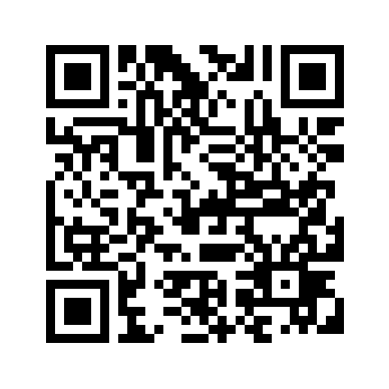

✅ Código QR generado y guardado como: codigo_qr.png


In [ ]:
# Importar librerías necesarias
import qrcode
import matplotlib.pyplot as plt

def generar_codigo_qr(info_devolucion, nombre_archivo="codigo_qr.png"):
    """
    Genera un código QR con los datos de devolución, lo guarda como imagen
    y lo muestra en pantalla.
    """

    # Crear código QR
    qr = qrcode.make(info_devolucion)
    qr.save(nombre_archivo)  # Guardar QR como imagen

    # Mostrar el código QR generado
    plt.imshow(qr, cmap="gray")
    plt.axis("off")  # Ocultar ejes
    plt.show()

    print(f"✅ Código QR generado y guardado como: {nombre_archivo}")

# Ejemplo de uso:
generar_codigo_qr("Orden: 12345 - Punto de devolución: Sucursal A")


 Fase 3: Seguimiento de Reembolsos y Optimización Logística
Esta fase se encarga de verificar, gestionar y automatizar el proceso de reembolsos para que el sistema controle si el cliente realmente devolvió el producto antes de procesar el reembolso.
 ¿Para qué sirve esta fase?
Cuando un cliente devuelve un producto, el reembolso no debería procesarse hasta que el producto sea recibido y validado. Esta fase automatiza ese proceso para evitar fraudes, errores o retrasos en los reembolsos.

💡 Ejemplo de problema sin esta fase:
📦 Un cliente devuelve un producto, pero el reembolso se procesa sin verificar si el producto realmente llegó al centro de devoluciones.
➡ Consecuencia: La empresa pierde dinero si el producto nunca se devuelve.

💡 Solución con IA:
📌 Un sistema automatizado rastrea el paquete devuelto y, cuando se recibe en el almacén, activa automáticamente el reembolso. Beneficios de esta Optimización
✅ Evita fraudes asegurando que solo se reembolsen pedidos realmente devueltos.
✅ Mejora la comunicación con el cliente enviando notificaciones automatizadas.
✅ Reduce la carga operativa del equipo de atención al cliente.
✅ Optimiza la logística al integrar una API de seguimiento de paquetes.




In [ ]:
import time
import requests
import smtplib
from email.mime.text import MIMEText

# Configuración del servidor de correo (Ejemplo con Gmail, se puede cambiar)
SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 587
EMAIL_USER = "tu_email@gmail.com"  # Cambia por tu email
EMAIL_PASSWORD = "tu_contraseña"   # Usa una contraseña de aplicación segura

def enviar_correo(destinatario, asunto, mensaje):
    """
    Envía un correo electrónico notificando el estado del reembolso.
    """
    try:
        msg = MIMEText(mensaje)
        msg["Subject"] = asunto
        msg["From"] = EMAIL_USER
        msg["To"] = destinatario

        server = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
        server.starttls()
        server.login(EMAIL_USER, EMAIL_PASSWORD)
        server.sendmail(EMAIL_USER, destinatario, msg.as_string())
        server.quit()

        print(f"📩 Notificación enviada a {destinatario}")

    except Exception as e:
        print(f"❌ Error enviando el email: {e}")

def verificar_estado_envio(tracking_number):
    """
    Simula una consulta a una API de seguimiento de paquetes.
    (En un caso real, se usaría una API de FedEx, DHL, UPS, etc.)
    """
    url = f"https://api.ejemplo-seguimiento.com/status/{tracking_number}"  # Simulación
    try:
        response = requests.get(url)
        data = response.json()
        return data["status"]  # Ejemplo: "Entregado", "En tránsito", "Pendiente de envío"
    except:
        return "Error en la consulta"

def seguimiento_reembolso(orden, tracking_number, email_cliente):
    """
    Verifica el estado de la devolución usando un tracking number.
    Si el producto fue recibido, aprueba automáticamente el reembolso y envía una notificación al cliente.
    """
    print(f"📌 Consultando estado de la devolución para la orden {orden}...")

    estado = verificar_estado_envio(tracking_number)
    time.sleep(2)  # Simulación de tiempo de consulta

    if estado.lower() == "entregado":
        print(f"✅ Producto recibido. Reembolso procesado para la orden {orden}. Será acreditado en 3 días hábiles.")
        enviar_correo(
            email_cliente,
            "📢 Confirmación de Reembolso",
            f"Estimado cliente,\n\nHemos recibido su devolución para la orden {orden}. Su reembolso será acreditado en 3 días hábiles.\n\nGracias por su paciencia.\n\nAtentamente,\nEquipo de Atención al Cliente"
        )
    else:
        print(f"⚠️ Aún no hemos recibido el producto de la orden {orden}. Estado actual: {estado}.")
        enviar_correo(
            email_cliente,
            "🚨 Devolución Pendiente",
            f"Estimado cliente,\n\nNo hemos recibido su devolución para la orden {orden}. Estado actual: {estado}.\n\nPor favor, complete la devolución lo antes posible para procesar su reembolso.\n\nAtentamente,\nEquipo de Atención al Cliente"
        )

# Ejemplo de uso:
# seguimiento_reembolso("12345", "XYZ987654", "cliente@example.com")


In [ ]:
!mv src/src/src/src/*.py src/  # Mueve todos los archivos .py a src/
!rm -rf src/src/src/           # Borra las carpetas innecesarias


mv: cannot stat 'src/src/src/src/*.py': No such file or directory


In [ ]:
!ls -R


.:
codigo_qr.png						 README.md	   src
Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb  requirements.txt

./src:
chatbot_reclamos.py  __pycache__		verificacion_producto.py
generar_qr.py	     seguimiento_reembolsos.py

./src/__pycache__:
chatbot_reclamos.cpython-311.pyc  seguimiento_reembolsos.cpython-311.pyc
generar_qr.cpython-311.pyc	  verificacion_producto.cpython-311.pyc


In [ ]:
import sys
sys.path.append("src")  # Agrega la carpeta src al path de Python


In [ ]:
from verificacion_producto import verificar_producto
from chatbot_reclamos import generar_reclamo
from generar_qr import generar_codigo_qr
from seguimiento_reembolsos import seguimiento_reembolso


In [ ]:
import os
os.chdir("/content/Generaci-n-de-Prompts-con-IA")  # Cambia a la carpeta raíz del proyecto


In [ ]:
import os
print(os.getcwd())  # Muestra la ubicación actual


/content/Generaci-n-de-Prompts-con-IA


In [ ]:
import os
print(os.listdir())  # Lista los archivos en la ubicación actual


['codigo_qr.png', 'Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb', '.git', 'requirements.txt', 'src', 'README.md']


In [ ]:
!git clone https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA.git


Cloning into 'Generaci-n-de-Prompts-con-IA'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 70 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 36.16 KiB | 1.45 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
import os
print(os.listdir("/content"))


['.config', 'Generaci-n-de-Prompts-con-IA', 'sample_data']


In [ ]:
import os
os.chdir("/content/Generaci-n-de-Prompts-con-IA")  # Cambia al directorio del proyecto
print("Directorio actual:", os.getcwd())  # Verifica que estás en la carpeta correcta


Directorio actual: /content/Generaci-n-de-Prompts-con-IA


In [ ]:
print(os.listdir())  # Muestra los archivos y carpetas dentro del proyecto


['codigo_qr.png', 'Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb', 'Generaci-n-de-Prompts-con-IA', '.git', 'requirements.txt', 'src', 'README.md']


In [ ]:
import os
os.chdir("/content/Generaci-n-de-Prompts-con-IA")  # Cambia al directorio del proyecto
print("Directorio actual:", os.getcwd())  # Verifica que estás en la carpeta correcta


Directorio actual: /content/Generaci-n-de-Prompts-con-IA


In [ ]:
print(os.listdir("src"))  # Lista los archivos dentro de src


['seguimiento_reembolsos.py', '__pycache__', 'chatbot_reclamos.py', 'verificacion_producto.py', 'generar_qr.py', '.gitkeep']


In [ ]:
import sys
sys.path.append(os.path.abspath("src"))  # Agrega la carpeta src al path


In [ ]:
from verificacion_producto import verificar_producto
from chatbot_reclamos import generar_reclamo
from generar_qr import generar_codigo_qr
from seguimiento_reembolsos import seguimiento_reembolso

print("✅ Importaciones exitosas")


✅ Importaciones exitosas


In [ ]:
!cat requirements.txt


openai
tensorflow
opencv-python
numpy
qrcode[pil]
matplotlib
requests


In [ ]:
!pip install -r requirements.txt


In [ ]:
!pip show qrcode


Name: qrcode
Version: 8.0
Summary: QR Code image generator
Home-page: https://github.com/lincolnloop/python-qrcode
Author: Lincoln Loop
Author-email: info@lincolnloop.com
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: 


In [ ]:
!pip install qrcode[pil]


In [ ]:
import qrcode
import openai
import tensorflow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

print("✅ Todas las librerías están instaladas correctamente.")


✅ Todas las librerías están instaladas correctamente.


In [ ]:
from src.verificacion_producto import verificar_producto
from src.chatbot_reclamos import generar_reclamo
from src.generar_qr import generar_codigo_qr
from src.seguimiento_reembolsos import seguimiento_reembolso

print("✅ Importaciones exitosas")


✅ Importaciones exitosas


In [ ]:
resultado = verificar_producto("producto_recibido.jpg")  # Asegúrate de tener una imagen de prueba
print(resultado)


📦 Verificando imagen del producto: producto_recibido.jpg
✅ Producto verificado (simulación)


In [ ]:
!git pull


remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 1.12 KiB | 1.12 MiB/s, done.
From https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA
   da5ad94..fbc4d81  main       -> origin/main
Updating da5ad94..fbc4d81
Fast-forward
 src/chatbot_reclamos.py | 9 ++++-----
 1 file changed, 4 insertions(+), 5 deletions(-)


In [ ]:
!pip install --upgrade openai


In [ ]:
resultado = verificar_producto("producto_recibido.jpg")  # Simulación, cambia el nombre si tienes otra imagen
print(resultado)


📦 Verificando imagen del producto: producto_recibido.jpg
✅ Producto verificado (simulación)


In [ ]:
!git add Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb
!git commit -m "Actualización final del notebook"
!git push origin main


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [ ]:
!git add .
!git commit -m "Sincronización final del proyecto"
!git push origin main


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [ ]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git commit -a --amend -m "Actualización forzada del notebook"
!git push origin main --force


[main ba5230b] Actualización forzada del notebook
 Date: Mon Feb 17 01:48:12 2025 -0300
 1 file changed, 2 insertions(+), 7 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 347 bytes | 347.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA.git
 + 9c2b971...ba5230b main -> main (forced update)


In [ ]:
!ls -lh Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb


-rw-r--r-- 1 root root 34K Feb 17 04:34 Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb


In [ ]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git add Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb


In [ ]:
!git commit -m "Actualización del notebook de optimización"


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git push origin main


Everything up-to-date


In [ ]:
!git push --force origin main


Everything up-to-date


In [ ]:
!ls -lh Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb


-rw-r--r-- 1 root root 34K Feb 17 04:34 Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb


In [ ]:
!git add -A
!git commit -m "Forzar actualización del notebook"
!git push --force origin main


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [1]:
import random

def generar_mensaje_personalizado(cliente, producto, valor, tipo_cliente):
    """
    Genera un mensaje automatizado basado en el tipo de cliente y el valor del producto.

    - cliente: Nombre del cliente
    - producto: Producto comprado
    - valor: Categoría del valor del producto ('bajo', 'medio', 'alto')
    - tipo_cliente: Tipo de cliente ('nuevo', 'frecuente', 'vip')
    """

    mensajes = {
        "bajo": {
            "nuevo": f"Hola {cliente}, gracias por tu compra del {producto}. ¡Esperamos que lo disfrutes! 😊",
            "frecuente": f"Hola {cliente}, tu {producto} ya está en camino. ¡Gracias por confiar en nosotros nuevamente! 🚀",
            "vip": f"{cliente}, tu {producto} ya fue despachado. Como siempre, cuentas con nuestra mejor atención. ⭐"
        },
        "medio": {
            "nuevo": f"Hola {cliente}, tu pedido de {producto} ha sido confirmado. ¡Te enviaremos novedades pronto! 📦",
            "frecuente": f"{cliente}, tu {producto} está en camino. ¡Gracias por seguir eligiéndonos! 🛍️",
            "vip": f"{cliente}, hemos priorizado tu envío de {producto}. ¡Gracias por ser un cliente especial! ✨"
        },
        "alto": {
            "nuevo": f"Estimado {cliente}, tu pedido de {producto} ha sido procesado con prioridad. Pronto recibirás novedades. 📲",
            "frecuente": f"Hola {cliente}, tu {producto} está en camino. Sabemos lo importante que es para ti. 📦",
            "vip": f"{cliente}, tu {producto} ha sido enviado con el más alto estándar de seguridad. Gracias por confiar en nosotros. 🏆"
        }
    }

    return mensajes[valor][tipo_cliente]

# **Prueba del sistema**
if __name__ == "__main__":
    clientes = ["María", "José", "Laura", "Carlos"]
    productos = ["Celular X", "Notebook Pro", "Auriculares Inalámbricos"]
    valores = ["bajo", "medio", "alto"]
    tipos_clientes = ["nuevo", "frecuente", "vip"]

    # Prueba con datos aleatorios
    for _ in range(5):
        cliente = random.choice(clientes)
        producto = random.choice(productos)
        valor = random.choice(valores)
        tipo_cliente = random.choice(tipos_clientes)

        mensaje = generar_mensaje_personalizado(cliente, producto, valor, tipo_cliente)
        print(mensaje)


Laura, hemos priorizado tu envío de Notebook Pro. ¡Gracias por ser un cliente especial! ✨
Hola María, tu Auriculares Inalámbricos está en camino. Sabemos lo importante que es para ti. 📦
Estimado José, tu pedido de Celular X ha sido procesado con prioridad. Pronto recibirás novedades. 📲
Estimado Carlos, tu pedido de Notebook Pro ha sido procesado con prioridad. Pronto recibirás novedades. 📲
José, tu Celular X está en camino. ¡Gracias por seguir eligiéndonos! 🛍️


In [6]:
import qrcode

def generar_qr_reclamo(numero_reclamo):
    """
    Genera un código QR con el número de reclamo.
    :param numero_reclamo: ID único del reclamo.
    :return: Guarda la imagen del QR con el reclamo.
    """
    # 🔗 URL o texto del QR (puede ser un link a la consulta del reclamo)
    url_reclamo = f"https://miempresa.com/reclamos/{numero_reclamo}"

    # 📌 Crear el QR
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(url_reclamo)
    qr.make(fit=True)

    # 🎨 Crear imagen del QR
    img = qr.make_image(fill="black", back_color="white")

    # 📂 Guardar la imagen con el número de reclamo
    nombre_archivo = f"qr_reclamo_{numero_reclamo}.png"
    img.save(nombre_archivo)

    print(f"✅ QR generado: {nombre_archivo}")

# 🔥 **Prueba con un reclamo**
generar_qr_reclamo(12345)  # Reemplaza con el número de reclamo real


✅ QR generado: qr_reclamo_12345.png


In [4]:
!pip install qrcode[pil]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.5 MB/s eta 0:00:00


 Integrar QR + Mensajes Personalizados

In [7]:
import qrcode

def generar_qr_reclamo(numero_reclamo):
    """
    Genera un código QR con el número de reclamo.
    """
    url_reclamo = f"https://miempresa.com/reclamos/{numero_reclamo}"

    qr = qrcode.make(url_reclamo)  # Generar QR
    nombre_archivo = f"qr_reclamo_{numero_reclamo}.png"

    qr.save(nombre_archivo)  # Guardar imagen

    return nombre_archivo  # Retorna el nombre del archivo QR generado


def generar_mensaje_reclamo(nombre_cliente, numero_reclamo, producto, es_cliente_vip):
    """
    Genera un mensaje personalizado para el cliente con su número de reclamo y un tono adecuado.
    """
    # Generamos el QR
    qr = generar_qr_reclamo(numero_reclamo)

    # Definir el tono del mensaje según el producto
    if producto.lower() in ["notebook pro", "celular x"]:
        tono = "formal"
        mensaje = f"Estimado/a {nombre_cliente}, lamentamos el inconveniente con su {producto}. Hemos generado su reclamo con prioridad. Su código QR de seguimiento ha sido generado."
    else:
        tono = "amigable"
        mensaje = f"{nombre_cliente}, tu reclamo por {producto} está en proceso. Te mantendremos informado/a. Aquí tienes tu código QR para seguimiento."

    # Agregar personalización para clientes VIP
    if es_cliente_vip:
        mensaje += " 🎉 ¡Gracias por ser un cliente especial! Siempre estamos aquí para ayudarte."

    return mensaje, qr  # Retorna el mensaje y el QR generado


# 🔥 **Prueba con diferentes casos**
mensaje, qr_generado = generar_mensaje_reclamo("Laura", 56789, "Notebook Pro", True)
print("📩 Mensaje generado:")
print(mensaje)
print(f"📎 Código QR generado: {qr_generado}")


📩 Mensaje generado:
Estimado/a Laura, lamentamos el inconveniente con su Notebook Pro. Hemos generado su reclamo con prioridad. Su código QR de seguimiento ha sido generado. 🎉 ¡Gracias por ser un cliente especial! Siempre estamos aquí para ayudarte.
📎 Código QR generado: qr_reclamo_56789.png


In [8]:
!git add src/generar_qr.py
!git add src/mensajes_personalizados.py  # Si este archivo existe
!git commit -m "Integración de QR con mensajes personalizados"
!git push origin main


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [9]:
!pwd


/content


In [10]:
%cd /content/Generaci-n-de-Prompts-con-IA


[Errno 2] No such file or directory: '/content/Generaci-n-de-Prompts-con-IA'
/content


In [11]:
!ls -lh /content


total 12K
-rw-r--r-- 1 root root  681 Mar  3 22:06 qr_reclamo_12345.png
-rw-r--r-- 1 root root  690 Mar  3 22:20 qr_reclamo_56789.png
drwxr-xr-x 1 root root 4.0K Feb 28 14:20 sample_data


In [12]:
!git clone https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA.git


Cloning into 'Generaci-n-de-Prompts-con-IA'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
error: RPC failed; curl 56 GnuTLS recv error (-24): Decryption has failed.
fatal: early EOF
fatal: fetch-pack: invalid index-pack output


In [13]:
!git clone https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA.git


Cloning into 'Generaci-n-de-Prompts-con-IA'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 115 (delta 53), reused 8 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 52.80 KiB | 761.00 KiB/s, done.
Resolving deltas: 100% (53/53), done.


In [14]:
%cd /content/Generaci-n-de-Prompts-con-IA


/content/Generaci-n-de-Prompts-con-IA


In [15]:
!ls -lh


total 80K
-rw-r--r-- 1 root root  65K Mar  3 23:44 Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb
-rw-r--r-- 1 root root 3.6K Mar  3 23:44 README.md
-rw-r--r-- 1 root root   70 Mar  3 23:44 requirements.txt
drwxr-xr-x 2 root root 4.0K Mar  3 23:44 src


In [2]:
!git add src/generar_qr.py
!git add Optimización_de_la_Gestión_de_Devoluciones_con_IA.ipynb
!git commit -m "Integración de QR con mensajes personalizados y actualización del notebook"
!git push origin main


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [1]:
!ls -lh src/


ls: cannot access 'src/': No such file or directory


In [4]:
def generar_mensaje(cliente, producto, prioridad=False):
    """
    Genera un mensaje personalizado según el cliente y el producto.
    - prioridad: si es True, el mensaje tendrá un tono más cercano.
    """
    if prioridad:
        return f"{cliente}, hemos priorizado tu envío de {producto}. ¡Gracias por ser un cliente especial! ✨"
    else:
        return f"{cliente}, tu {producto} está en camino. ¡Gracias por seguir eligiéndonos! 🛍️"

# Prueba del código:
if __name__ == "__main__":
    print(generar_mensaje("Laura", "Notebook Pro", prioridad=True))
    print(generar_mensaje("José", "Celular X"))


Laura, hemos priorizado tu envío de Notebook Pro. ¡Gracias por ser un cliente especial! ✨
José, tu Celular X está en camino. ¡Gracias por seguir eligiéndonos! 🛍️


In [5]:
!ls src/


ls: cannot access 'src/': No such file or directory


In [6]:
!git add src/mensajes_personalizados.py
!git commit -m "Generación de mensajes sin API"


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [7]:
!git push origin main


fatal: not a git repository (or any of the parent directories): .git


In [8]:
!pwd  # Muestra la ruta actual en Colab



/content


In [9]:
%cd /content/Generaci-n-de-Prompts-con-IA


[Errno 2] No such file or directory: '/content/Generaci-n-de-Prompts-con-IA'
/content


In [10]:
!git status


fatal: not a git repository (or any of the parent directories): .git


In [11]:
!git clone https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA.git
%cd Generaci-n-de-Prompts-con-IA


Cloning into 'Generaci-n-de-Prompts-con-IA'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 115 (delta 53), reused 8 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 52.80 KiB | 1.06 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/Generaci-n-de-Prompts-con-IA


In [12]:
!git add src/mensajes_personalizados.py
!git commit -m "Generación de mensajes sin API"
!git push origin main


fatal: pathspec 'src/mensajes_personalizados.py' did not match any files
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [1]:
!mkdir -p src  # Crea la carpeta src si no existe
!touch src/mensajes_personalizados.py  # Crea el archivo vacío


In [2]:
%%writefile src/mensajes_personalizados.py
def generar_mensaje(nombre, producto):
    return f"{nombre}, tu {producto} está en camino. ¡Gracias por elegirnos! 🚀"

# Prueba del código
if __name__ == "__main__":
    print(generar_mensaje("Laura", "Notebook Pro"))


Overwriting src/mensajes_personalizados.py


In [3]:
!ls src/



mensajes_personalizados.py


In [4]:
!git add src/mensajes_personalizados.py
!git commit -m "Agregado script de generación de mensajes personalizados"
!git push origin main


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [5]:
!pwd


/content


In [6]:
!git clone https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA.git


Cloning into 'Generaci-n-de-Prompts-con-IA'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 115 (delta 53), reused 8 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (115/115), 52.80 KiB | 1.06 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [7]:
%cd /content/Generaci-n-de-Prompts-con-IA


/content/Generaci-n-de-Prompts-con-IA


In [8]:
!git status


On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [9]:
!git add src/mensajes_personalizados.py
!git commit -m "Agregado mensajes personalizados sin API"
!git push origin main


fatal: pathspec 'src/mensajes_personalizados.py' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@31b680a95758.(none)')
fatal: could not read Username for 'https://github.com': No such device or address


In [10]:
!pwd


/content/Generaci-n-de-Prompts-con-IA


In [11]:
!git config --global user.email "benitml980@example.com"
!git config --global user.name "benitez-hue"


In [12]:
!git config --list


filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=benitml980@example.com
user.name=benitez-hue
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/benitez-hue/Generaci-n-de-Prompts-con-IA.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [13]:
%%writefile src/mensajes_personalizados.py
def generar_mensaje(nombre, producto):
    return f"{nombre}, tu {producto} está en camino. ¡Gracias por elegirnos! 🚀"

# Prueba del código
if __name__ == "__main__":
    print(generar_mensaje("Laura", "Notebook Pro"))


Writing src/mensajes_personalizados.py


In [14]:
!ls src/


generar_qr.py  mensajes_personalizados.py  seguimiento_reembolsos.py  verificacion_producto.py


In [15]:
!git add src/mensajes_personalizados.py
!git commit -m "Agregado mensajes personalizados sin API"


[main 9aa08bd] Agregado mensajes personalizados sin API
 1 file changed, 6 insertions(+)
 create mode 100644 src/mensajes_personalizados.py


In [16]:
!git push origin main


fatal: could not read Username for 'https://github.com': No such device or address


In [17]:
%cd Generaci-n-de-Prompts-con-IA


[Errno 2] No such file or directory: 'Generaci-n-de-Prompts-con-IA'
/content/Generaci-n-de-Prompts-con-IA


In [18]:
!ls src/


generar_qr.py  mensajes_personalizados.py  seguimiento_reembolsos.py  verificacion_producto.py


In [19]:
from src.mensajes_personalizados import generar_mensaje

print(generar_mensaje("Laura", "Notebook Pro"))


Laura, tu Notebook Pro está en camino. ¡Gracias por elegirnos! 🚀
